In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

In [17]:
df = pd.read_csv("./DATA/heart_disease_uci.csv")
#checking head
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [18]:
##Cleaning the Data
#Converting true/false to 1 and 0
df["fbs"] = df["fbs"].apply(lambda x: 1 if x == True else 0)
df["exang"] = df["exang"].apply(lambda x: 1 if x == True else 0)
#convert sex to 1 = Male and 0 = Female
df["sex"] = df["sex"].apply(lambda x: 1 if x == "Male" else 0)

<Axes: >

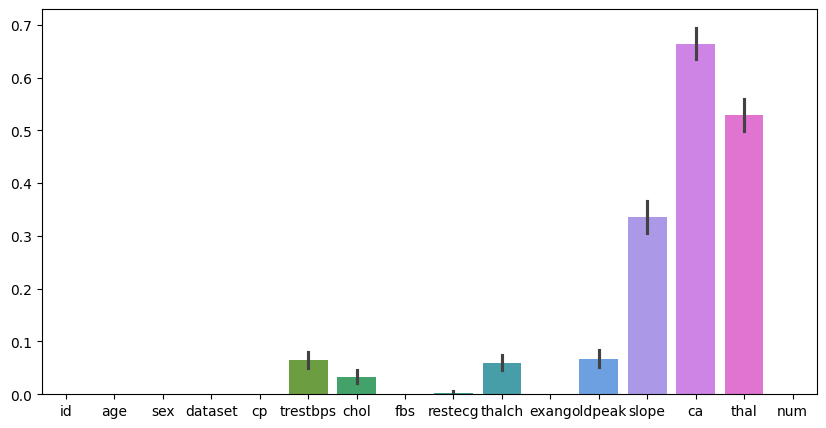

In [229]:
#Checking how man null values we have
plt.figure(figsize=(10,5))
sns.barplot(df.isnull())

In [19]:
#apply -1 so the ML knows that there is no Value
df["ca"].fillna(-1, inplace=True)
df = pd.get_dummies(df, columns=['slope', 'thal', 'cp'], drop_first=True)
#same applies to slope 
df.drop("slope", axis=1, inplace=True)
#change the thal colums to dummies and replace NaN with Uknown
df["thal"].fillna("unknown", inplace=True)
df.drop("thal", axis=1, inplace=True)
#change the thal colums to dummies
df.drop("cp", axis=1, inplace=True)


C:\Users\erayz\AppData\Local\Temp\ipykernel_9988\3396548542.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(-1, inplace=True)
C:\Users\erayz\AppData\Local\Temp\ipykernel_9988\3396548542.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [20]:
#for the rest we will use for the NaN values the median values
df["trestbps"].fillna(df["trestbps"].median(),inplace=True)
df["chol"].fillna(df["chol"].median(),inplace=True)
df["thalch"].fillna(df["thalch"].median(),inplace=True)
df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)

C:\Users\erayz\AppData\Local\Temp\ipykernel_9988\501606690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trestbps"].fillna(df["trestbps"].median(),inplace=True)
C:\Users\erayz\AppData\Local\Temp\ipykernel_9988\501606690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["chol"].fillna(df["chol"].median(),inplace=True)
C:\Users\erayz\AppData\Local\Temp\ipykernel_9988\501606690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [27]:
#Drop columns since we converted them
df.drop("dataset",axis=1,inplace=True)
df.drop("restecg",axis=1,inplace=True)
df.drop("thal",axis=1,inplace=True)

KeyError: "['restecg'] not found in axis"

In [28]:
df.de

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,num,flat,upsloping,normal,reversable defect,unknown,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,1,145.0,233.0,1,150.0,0,2.3,0.0,...,0,False,False,False,False,False,False,False,False,True
1,2,67,1,160.0,286.0,0,108.0,1,1.5,3.0,...,2,True,False,True,False,False,True,False,False,False
2,3,67,1,120.0,229.0,0,129.0,1,2.6,2.0,...,1,True,False,False,True,False,True,False,False,False
3,4,37,1,130.0,250.0,0,187.0,0,3.5,0.0,...,0,False,False,True,False,False,False,False,True,False
4,5,41,0,130.0,204.0,0,172.0,0,1.4,0.0,...,0,False,True,True,False,False,False,True,False,False


In [71]:
df = df.loc[:, ~df.columns.duplicated()]

In [72]:
# Sicherstellen, dass die Spalten als Strings behandelt werden
print(df.columns.duplicated())

[False False False False False False False False False False False False
 False False False False False False False False False]


In [51]:
df['cp'] = df[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']].idxmax(axis=1)

In [65]:
df.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,flat,upsloping,normal,reversable defect,unknown,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,cp
0,1,63,1,145.0,233.0,1,150.0,0,2.3,0.0,...,False,False,False,False,False,False,False,False,True,cp_typical angina
1,2,67,1,160.0,286.0,0,108.0,1,1.5,3.0,...,True,False,True,False,False,True,False,False,False,cp_asymptomatic
2,3,67,1,120.0,229.0,0,129.0,1,2.6,2.0,...,True,False,False,True,False,True,False,False,False,cp_asymptomatic
3,4,37,1,130.0,250.0,0,187.0,0,3.5,0.0,...,False,False,True,False,False,False,False,True,False,cp_non-anginal
4,5,41,0,130.0,204.0,0,172.0,0,1.4,0.0,...,False,True,True,False,False,False,True,False,False,cp_atypical angina


In [66]:
#After Cleaning the data we are now training our modell
X = df.drop(["cp_asymptomatic","cp_atypical angina","cp_non-anginal","cp_typical angina","cp","id"],axis=1)
y = df['cp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
#Using GridSearch to find the best Hyperparameters and training our modell
param= {"n_estimators":[1,10, 50, 300], "min_samples_leaf":[12, 3, 10, 6], "min_samples_split":[2, 5, 10, 12], "max_depth":[None, 15,10, 20, 30]}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid=param,verbose=3)

grid.fit(X_train, y_train)

predicted = grid.predict(X_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.465 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.488 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.302 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.434 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.453 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.558 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.589 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.504 

In [68]:
#Evulation of Random Forest
print(classification_report(y_test,predicted))

                    precision    recall  f1-score   support

   cp_asymptomatic       0.70      0.81      0.75       148
cp_atypical angina       0.50      0.56      0.53        48
    cp_non-anginal       0.35      0.22      0.27        68
 cp_typical angina       0.38      0.25      0.30        12

          accuracy                           0.60       276
         macro avg       0.48      0.46      0.46       276
      weighted avg       0.57      0.60      0.58       276

